<Axes: xlabel='Year'>

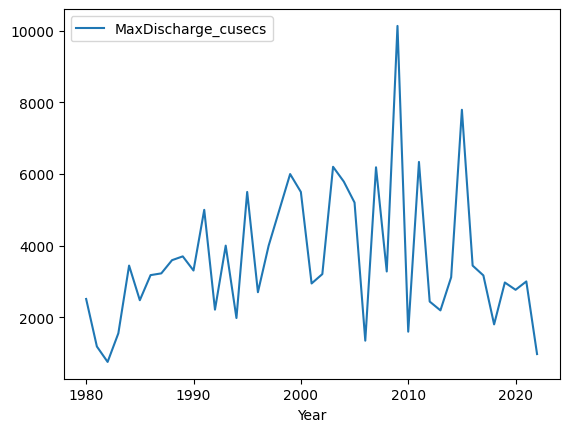

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r"E:\Major_Project\Maximum_Dicharge.csv", encoding="utf-8-sig")
data = data.set_index('Year')
data.head()
data.plot()



In [17]:
data['Rank'] = data['MaxDischarge_cusecs'].rank(method='min', ascending=False).astype(int)


data=data.sort_values(by='Rank', ascending=True)
data.head()

,MaxDischarge_cusecs,Rank
Year,,
2009,10139,1
2015,7796,2
2011,6339,3
2003,6203,4
2007,6189,5


In [18]:
n=len(data)
data['Exceedence_Probability'] = data['Rank']/(n+1)
data['Non_Exceedence_Probability'] = 1-data['Exceedence_Probability']
data

,MaxDischarge_cusecs,Rank,Exceedence_Probability,Non_Exceedence_Probability
Year,,,,
2009,10139,1,0.022727,0.977273
2015,7796,2,0.045455,0.954545
2011,6339,3,0.068182,0.931818
2003,6203,4,0.090909,0.909091
2007,6189,5,0.113636,0.886364
1999,6000,6,0.136364,0.863636
2004,5789,7,0.159091,0.840909
2000,5500,8,0.181818,0.818182
1995,5500,8,0.181818,0.818182


In [19]:
data['Return_Period'] = 1/data['Exceedence_Probability']
data.to_csv('return_period.csv')

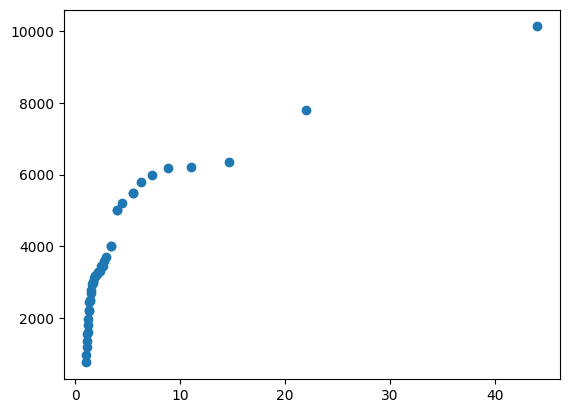

In [20]:
x=data['Return_Period']
y=data['MaxDischarge_cusecs']
plt.scatter(x,y)

## Linear regression

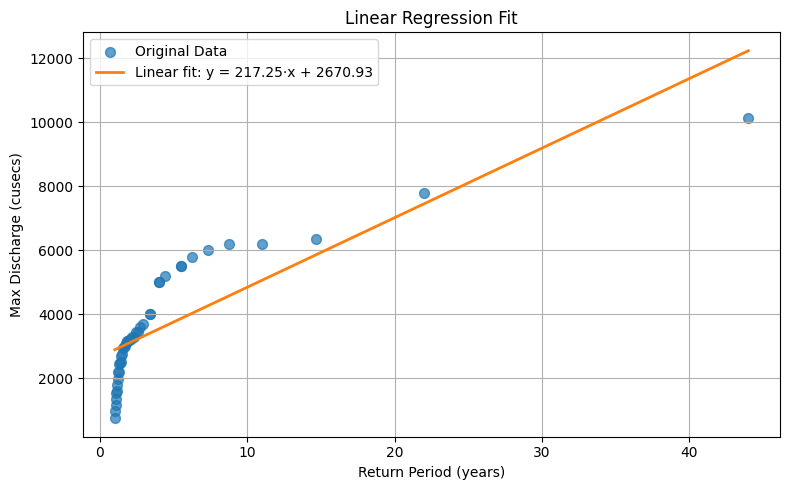

Predicted discharge at 25-year return period: 8102.15 cusecs
Predicted discharge at 50-year return period: 13533.37 cusecs
Predicted discharge at 100-year return period: 24395.82 cusecs


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# ─── 1. Fit a linear model y = m*x + c ───────────────────────────────────────────
m, c = np.polyfit(x, y, 1)

# ─── 2. Generate a smooth line for plotting ─────────────────────────────────────
X_plot = np.linspace(x.min(), x.max(), 200)
Y_line = m * X_plot + c

# ─── 3. Plot original data + fitted line ────────────────────────────────────────
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=50, alpha=0.7, label="Original Data")
plt.plot(X_plot, Y_line, color="C1", lw=2, label=f"Linear fit: y = {m:.2f}·x + {c:.2f}")
plt.xlabel("Return Period (years)")
plt.ylabel("Max Discharge (cusecs)")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ─── 4. Predict for x = 25, 50, 100 ──────────────────────────────────────────────
x_pred = np.array([25, 50, 100])
y_pred = m * x_pred + c

for xi, yi in zip(x_pred, y_pred):
    print(f"Predicted discharge at {xi}-year return period: {yi:.2f} cusecs")


# Polynomial Regression


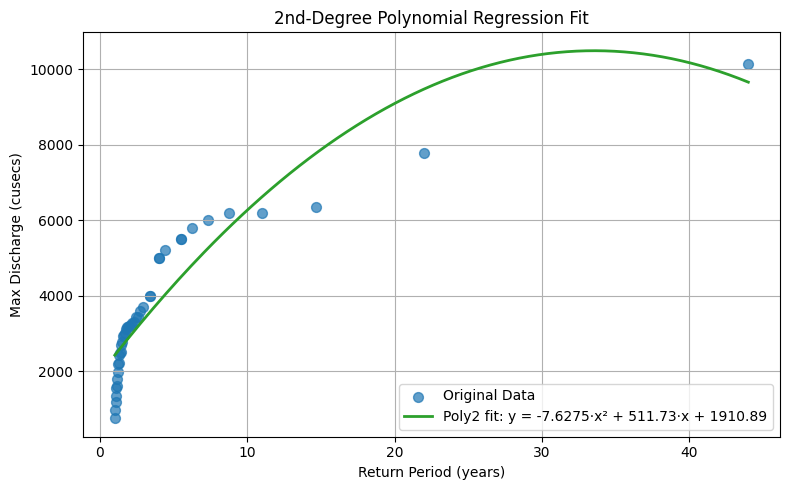

Predicted discharge at 25-year return period: 9936.89 cusecs
Predicted discharge at 50-year return period: 8428.49 cusecs
Predicted discharge at 100-year return period: -23191.47 cusecs


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# ─── 1. Fit a 2nd-degree polynomial y = a·x² + b·x + c ────────────────────────────
coeffs = np.polyfit(x, y, 2)      # returns [a, b, c]
a, b, c = coeffs

# ─── 2. Generate smooth curve for plotting ────────────────────────────────────────
X_plot = np.linspace(x.min(), x.max(), 200)
Y_poly = a * X_plot**2 + b * X_plot + c

# ─── 3. Plot original data + polynomial fit ──────────────────────────────────────
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=50, alpha=0.7, label="Original Data")
plt.plot(X_plot, Y_poly, color="C2", lw=2,
         label=f"Poly2 fit: y = {a:.4f}·x² + {b:.2f}·x + {c:.2f}")
plt.xlabel("Return Period (years)")
plt.ylabel("Max Discharge (cusecs)")
plt.title("2nd-Degree Polynomial Regression Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ─── 4. Predict for x = 25, 50, 100 ───────────────────────────────────────────────
x_pred = np.array([25, 50, 100])
y_pred = a * x_pred**2 + b * x_pred + c

for xi, yi in zip(x_pred, y_pred):
    print(f"Predicted discharge at {xi}-year return period: {yi:.2f} cusecs")


# Gumbel distribution method


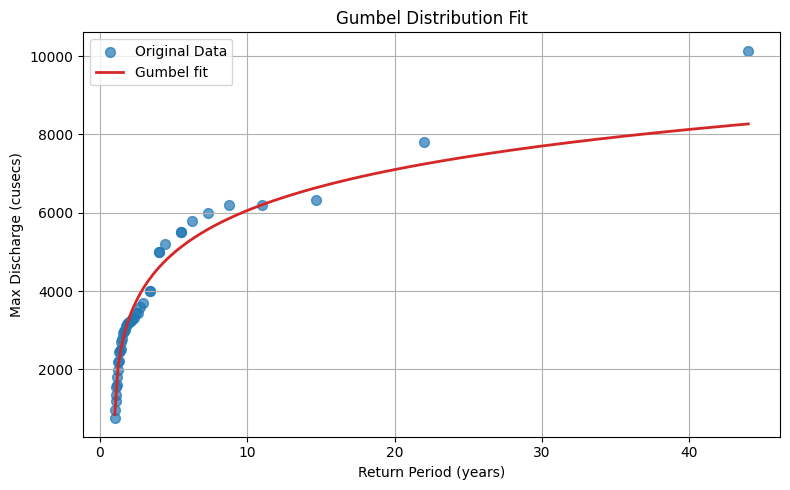

Predicted discharge at 25-year return period: 7435.16 cusecs
Predicted discharge at 50-year return period: 8457.35 cusecs
Predicted discharge at 100-year return period: 9472.00 cusecs


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# ─── 1. Fit the Gumbel distribution to your discharge data ───────────────────────
# Assumes x and y are already defined numpy arrays:
#   x = return periods
#   y = MaxDischarge_cusecs

loc, scale = gumbel_r.fit(y)  # fit returns the location and scale parameters

# ─── 2. Generate a smooth Gumbel-based curve for plotting ───────────────────────
X_plot = np.linspace(x.min(), x.max(), 200)
# Compute the quantile (inverse CDF) at probabilities 1 - 1/T for each return period T
Y_gumbel = gumbel_r.ppf(1 - 1.0 / X_plot, loc=loc, scale=scale)

# ─── 3. Plot original data + Gumbel fit ─────────────────────────────────────────
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=50, alpha=0.7, label="Original Data")
plt.plot(X_plot, Y_gumbel, color="C3", lw=2,
         label="Gumbel fit")
plt.xlabel("Return Period (years)")
plt.ylabel("Max Discharge (cusecs)")
plt.title("Gumbel Distribution Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ─── 4. Predict for x = 25, 50, 100 ─────────────────────────────────────────────
x_pred = np.array([25, 50, 100])
y_pred = gumbel_r.ppf(1 - 1.0 / x_pred, loc=loc, scale=scale)

for xi, yi in zip(x_pred, y_pred):
    print(f"Predicted discharge at {xi}-year return period: {yi:.2f} cusecs")


# Logarithimic Regression

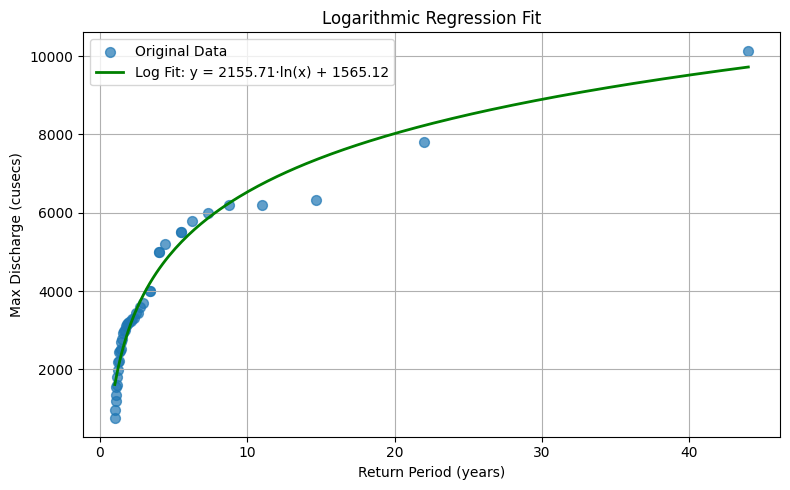

Predicted discharge at 25-year return period: 8504.10 cusecs
Predicted discharge at 50-year return period: 9998.32 cusecs
Predicted discharge at 100-year return period: 11492.55 cusecs


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# ─── 1. Fit a logarithmic model y = a·ln(x) + b ─────────────────────────────────
# Assumes x and y are already defined numpy arrays:
#   x = return periods
#   y = MaxDischarge_cusecs

logx = np.log(x)
a, b = np.polyfit(logx, y, 1)

# ─── 2. Generate smooth curve for plotting ───────────────────────────────────────
X_plot = np.linspace(x.min(), x.max(), 200)
Y_curve = a * np.log(X_plot) + b

# ─── 3. Plot original data + log fit ─────────────────────────────────────────────
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=50, alpha=0.7, label="Original Data")
plt.plot(X_plot, Y_curve, color="green", lw=2,
         label=f"Log Fit: y = {a:.2f}·ln(x) + {b:.2f}")
plt.xlabel("Return Period (years)")
plt.ylabel("Max Discharge (cusecs)")
plt.title("Logarithmic Regression Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ─── 4. Predict for x = 25, 50, 100 ───────────────────────────────────────────────
x_pred = np.array([25, 50, 100])
y_pred = a * np.log(x_pred) + b

for xi, yi in zip(x_pred, y_pred):
    print(f"Predicted discharge at {xi}-year return period: {yi:.2f} cusecs")
